In [1]:
%autosave 11

Autosaving every 11 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Define parameters and scores for plotting

version_numbers = [29, 25, 24, 23, 16, 15, 14, 16, 11, 4, 10, 5, 6, 9]

Runtime = [1046.0, 3029.5, 2233.6, 906.8, 23415.7, 30773.5, 26639.2, 23415.7, 13779.7, 334.7, 15416.5, 16283.4, 18272.8, 25190.3]

PRIVATE_scores = [0.795, 0.802, 0.802, 0.804, 0.8, 0.797, 0.795, 0.8, 0.799, 0.797, 0.78, 0.787, 0.784, 0.769]
public_scores = [0.805, 0.804, 0.804, 0.804, 0.807, 0.807, 0.808, 0.807, 0.805, 0.803, 0.788, 0.791, 0.787, 0.778]


versions = [
    {'depth_CATB': 2, 'learning_rate_CATB': 0.016097331631242523, 'iterations_CATB': 2862, 'metric_LGBM': 'binary_logloss', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'rf', 'num_leaves_LGBM': 116, 'feature_fraction_LGBM': 0.6566334027745866, 'bagging_fraction_LGBM': 0.6582340598735196, 'bagging_freq_LGBM': 14, 'learning_rate_LGBM': 0.000822142231763117, 'lambda_LGBM': 5.123955036045335e-09, 'n_estimators_XGBM': 1645, 'learning_rate_XGBM': 0.0075776572966009, 'max_depth_XGBM': 6, 'subsample_XGBM': 0.9580978536957814, 'colsample_bytree_XGBM': 0.22762250092655079, 'gamma_XGBM': 0.10463157373189615, 'Ensemble_Wt._CATB': 0.924138592986516, 'Ensemble_Wt._LGBM': 0.5050288820198565, 'Ensemble_Wt._XGBM': 0.43928033616685846},
    {'depth_CATB': 2, 'learning_rate_CATB': 0.016620609349323308, 'iterations_CATB': 3404, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': False, 'boosting_LGBM': 'gbdt', 'num_leaves_LGBM': 118, 'feature_fraction_LGBM': 0.539270032497571, 'bagging_fraction_LGBM': 0.3000245474379417, 'bagging_freq_LGBM': 34, 'learning_rate_LGBM': 0.0008079587290061307, 'lambda_LGBM': 0.037234477429371526, 'n_estimators_XGBM': 2555, 'learning_rate_XGBM': 0.0005613726856366409, 'max_depth_XGBM': 15, 'subsample_XGBM': 0.62732004288119, 'colsample_bytree_XGBM': 0.7851178854556712, 'gamma_XGBM': 0.044626398810116805, 'Ensemble_Wt._CATB': 0.4733473613858241, 'Ensemble_Wt._LGBM': 0.8954766022719048, 'Ensemble_Wt._XGBM': 0.8544203611479426},
    {'depth_CATB': 4, 'learning_rate_CATB': 0.009552456508537087, 'iterations_CATB': 3623, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': False, 'boosting_LGBM': 'rf', 'num_leaves_LGBM': 205, 'feature_fraction_LGBM': 0.5237423956728061, 'bagging_fraction_LGBM': 0.6344671697243992, 'bagging_freq_LGBM': 27, 'learning_rate_LGBM': 0.008215674746446557, 'lambda_LGBM': 0.0001119104479121004, 'n_estimators_XGBM': 1627, 'learning_rate_XGBM': 0.0002167926799446161, 'max_depth_XGBM': 15, 'subsample_XGBM': 0.28856318022784777, 'colsample_bytree_XGBM': 0.7167856811402418, 'gamma_XGBM': 0.029616578216436387, 'Ensemble_Wt._CATB': 0.29934442371729564, 'Ensemble_Wt._LGBM': 0.0016466639848096596, 'Ensemble_Wt._XGBM': 0.4655028112965457},
    {'depth_CATB': 4, 'learning_rate_CATB': 0.015652930374796828, 'iterations_CATB': 2325, 'metric_LGBM': 'binary_logloss', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'dart', 'num_leaves_LGBM': 503, 'feature_fraction_LGBM': 0.6104337233352262, 'bagging_fraction_LGBM': 0.3980424067659421, 'bagging_freq_LGBM': 35, 'learning_rate_LGBM': 0.0997342039126753, 'lambda_LGBM': 4.054011711597042e-07, 'n_estimators_XGBM': 3444, 'learning_rate_XGBM': 0.00024700639300462675, 'max_depth_XGBM': 8, 'subsample_XGBM': 0.2028704581918141, 'colsample_bytree_XGBM': 0.7996764410511196, 'gamma_XGBM': 1.3197264868405763e-08, 'Ensemble_Wt._CATB': 0.9558587544217804, 'Ensemble_Wt._LGBM': 0.26953409061268674, 'Ensemble_Wt._XGBM': 0.5249017158915735},
    {'depth_CATB': 3, 'learning_rate_CATB': 0.02296378442701884, 'iterations_CATB': 2026, 'metric_LGBM': 'binary_logloss', 'is_unbalance_LGBM': False, 'boosting_LGBM': 'dart', 'num_leaves_LGBM': 320, 'feature_fraction_LGBM': 0.6779376535189193, 'bagging_fraction_LGBM': 0.41451416034219174, 'bagging_freq_LGBM': 14, 'learning_rate_LGBM': 0.03905244286195844, 'lambda_LGBM': 0.0068375541069863365, 'n_estimators_XGBM': 840, 'learning_rate_XGBM': 0.0007062363042316833, 'max_depth_XGBM': 7, 'subsample_XGBM': 0.3213360624988158, 'colsample_bytree_XGBM': 0.686062689870715, 'gamma_XGBM': 0.03953270793740059, 'Ensemble_Wt._CATB': 0.6153122355446601, 'Ensemble_Wt._LGBM': 0.12478805287171646, 'Ensemble_Wt._XGBM': 0.41643591308045186},
    {'depth_CATB': 5, 'learning_rate_CATB': 0.00948038761005353, 'iterations_CATB': 2089, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'dart', 'num_leaves_LGBM': 685, 'feature_fraction_LGBM': 0.5264354846673278, 'bagging_fraction_LGBM': 0.538924332309438, 'bagging_freq_LGBM': 15, 'learning_rate_LGBM': 0.00013801326997764547, 'lambda_LGBM': 2.801886210631302e-06, 'n_estimators_XGBM': 3549, 'learning_rate_XGBM': 0.0014340217516579626, 'max_depth_XGBM': 3, 'subsample_XGBM': 0.26437071537176293, 'colsample_bytree_XGBM': 0.6078006778957729, 'gamma_XGBM': 0.010646465805343211, 'Ensemble_Wt._CATB': 0.9877402129456329, 'Ensemble_Wt._LGBM': 0.584921257147146, 'Ensemble_Wt._XGBM': 0.6628448307144652},
    {'depth_CATB': 3, 'learning_rate_CATB': 0.009377074702307135, 'iterations_CATB': 2280, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'rf', 'num_leaves_LGBM': 612, 'feature_fraction_LGBM': 0.4776648699145341, 'bagging_fraction_LGBM': 0.38902277040458716, 'bagging_freq_LGBM': 23, 'learning_rate_LGBM': 0.0549541802239751, 'lambda_LGBM': 2.4114216626586683e-07, 'n_estimators_XGBM': 2154, 'learning_rate_XGBM': 0.002237081983771879, 'max_depth_XGBM': 9, 'subsample_XGBM': 0.21315109367739576, 'colsample_bytree_XGBM': 0.5815235922555484, 'gamma_XGBM': 0.13975719260740632, 'Ensemble_Wt._CATB': 0.5238481547551813, 'Ensemble_Wt._LGBM': 0.0476035071190198, 'Ensemble_Wt._XGBM': 0.16730149584692067},
    {'depth_CATB': 3, 'learning_rate_CATB': 0.02296378442701884, 'iterations_CATB': 2026, 'metric_LGBM': 'binary_logloss', 'is_unbalance_LGBM': False, 'boosting_LGBM': 'dart', 'num_leaves_LGBM': 320, 'feature_fraction_LGBM': 0.6779376535189193, 'bagging_fraction_LGBM': 0.41451416034219174, 'bagging_freq_LGBM': 14, 'learning_rate_LGBM': 0.03905244286195844, 'lambda_LGBM': 0.0068375541069863365, 'n_estimators_XGBM': 840, 'learning_rate_XGBM': 0.0007062363042316833, 'max_depth_XGBM': 7, 'subsample_XGBM': 0.3213360624988158, 'colsample_bytree_XGBM': 0.686062689870715, 'gamma_XGBM': 0.03953270793740059, 'Ensemble_Wt._CATB': 0.6153122355446601, 'Ensemble_Wt._LGBM': 0.12478805287171646, 'Ensemble_Wt._XGBM': 0.41643591308045186},
    {'depth_CATB': 3, 'learning_rate_CATB': 0.02104426518993966, 'iterations_CATB': 2000, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'dart', 'num_leaves_LGBM': 436, 'feature_fraction_LGBM': 0.6850430715056016, 'bagging_fraction_LGBM': 0.4714780951300796, 'bagging_freq_LGBM': 5, 'learning_rate_LGBM': 0.022877686223927548, 'lambda_LGBM': 7.778865210980462e-07, 'n_estimators_XGBM': 3005, 'learning_rate_XGBM': 0.04739857482498256, 'max_depth_XGBM': 10, 'subsample_XGBM': 0.9110939315361143, 'colsample_bytree_XGBM': 0.27828848513581517, 'gamma_XGBM': 0.4956657342576948, 'Ensemble_Wt._CATB': 6.736349329373123, 'Ensemble_Wt._LGBM': 4.8995256344755544, 'Ensemble_Wt._XGBM': -1.1323392286468827},
    {'depth_CATB': 2, 'learning_rate_CATB': 0.24599172095942273, 'iterations_CATB': 2060, 'metric_LGBM': 'binary_logloss', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'rf', 'num_leaves_LGBM': 195, 'feature_fraction_LGBM': 0.505609126754888, 'bagging_fraction_LGBM': 0.3579498187664, 'bagging_freq_LGBM': 33, 'learning_rate_LGBM': 0.06583783068040784, 'lambda_LGBM': 1.7131762982197878e-05, 'n_estimators_XGBM': 3512, 'learning_rate_XGBM': 0.0001702831975579489, 'max_depth_XGBM': 11, 'subsample_XGBM': 0.45368816812218926, 'colsample_bytree_XGBM': 0.4053567649679554, 'gamma_XGBM': 0.5831473607594166, 'Ensemble_Wt._CATB': 8.835954103976487, 'Ensemble_Wt._LGBM': 2.1668022328984264, 'Ensemble_Wt._XGBM': 6.901053703286582},
    {'depth_CATB': 3, 'learning_rate_CATB': 0.06492445046541886, 'iterations_CATB': 3885, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': False, 'boosting_LGBM': 'gbdt', 'num_leaves_LGBM': 307, 'feature_fraction_LGBM': 0.6919240975405723, 'bagging_fraction_LGBM': 0.6299221642169277, 'bagging_freq_LGBM': 18, 'learning_rate_LGBM': 0.028039360763642027, 'lambda_LGBM': 1.3625050712064994e-06, 'n_estimators_XGBM': 1206, 'learning_rate_XGBM': 0.00027141383518318506, 'max_depth_XGBM': 7, 'subsample_XGBM': 0.8411781381194077, 'colsample_bytree_XGBM': 0.2820620246623765, 'gamma_XGBM': 0.14575865873663477, 'Ensemble_Wt._CATB': -1.3734384817612977, 'Ensemble_Wt._LGBM': 8.852261341464489, 'Ensemble_Wt._XGBM': -2.5819332404359043},
    {'depth_CATB': 3, 'learning_rate_CATB': 0.009138481507320472, 'iterations_CATB': 2255, 'metric_LGBM': 'binary_logloss', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'rf', 'num_leaves_LGBM': 492, 'feature_fraction_LGBM': 0.6298657163932395, 'bagging_fraction_LGBM': 0.48665830950117894, 'bagging_freq_LGBM': 23, 'learning_rate_LGBM': 0.0959160310411117, 'lambda_LGBM': 0.0025332955989880138, 'n_estimators_XGBM': 3658, 'learning_rate_XGBM': 0.0023894864348122445, 'max_depth_XGBM': 8, 'subsample_XGBM': 0.253066957162476, 'colsample_bytree_XGBM': 0.27290944817674595, 'gamma_XGBM': 0.0033056505811386067, 'Ensemble_Wt._CATB': 7.292116323432358, 'Ensemble_Wt._LGBM': 9.054659247367429, 'Ensemble_Wt._XGBM': -9.155462969970621},
    {'depth_CATB': 4, 'learning_rate_CATB': 0.009733644240203827, 'iterations_CATB': 3922, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': False, 'boosting_LGBM': 'rf', 'num_leaves_LGBM': 637, 'feature_fraction_LGBM': 0.5309790256820052, 'bagging_fraction_LGBM': 0.3887534143346917, 'bagging_freq_LGBM': 7, 'learning_rate_LGBM': 0.036137799930950155, 'lambda_LGBM': 0.031346736073199384, 'n_estimators_XGBM': 922, 'learning_rate_XGBM': 0.017392992603007206, 'max_depth_XGBM': 8, 'subsample_XGBM': 0.23364433133945284, 'colsample_bytree_XGBM': 0.30185565786074897, 'gamma_XGBM': 1.105910808983427e-06, 'Ensemble_Wt._CATB': 7.862837616246825, 'Ensemble_Wt._LGBM': 6.464919421031639, 'Ensemble_Wt._XGBM': -7.916455875608955},
    {'depth_CATB': 5, 'learning_rate_CATB': 0.024145863524622432, 'iterations_CATB': 3062, 'metric_LGBM': 'auc', 'is_unbalance_LGBM': True, 'boosting_LGBM': 'gbdt', 'num_leaves_LGBM': 145, 'feature_fraction_LGBM': 0.6431994551192837, 'bagging_fraction_LGBM': 0.5328397238592162, 'bagging_freq_LGBM': 19, 'learning_rate_LGBM': 0.09973821148726694, 'lambda_LGBM': 4.4714399671562585e-07, 'n_estimators_XGBM': 3062, 'learning_rate_XGBM': 0.09749306637761922, 'max_depth_XGBM': 11, 'subsample_XGBM': 0.8507148314256361, 'colsample_bytree_XGBM': 0.6904673316477242, 'gamma_XGBM': 0.001355989574389716, 'Ensemble_Wt._CATB': 7.758418397745888, 'Ensemble_Wt._LGBM': -0.4952932945615539, 'Ensemble_Wt._XGBM': -2.914142366511806}
]
# Need to check the feature Set of the Versions once more

In [4]:
labels = list(versions[0].keys())

# Generate Final_Score by multiplying each element of the first array by 0.52 and each element of the second array by 0.48
final_Score = [round((x * 0.52) + (y * 0.48),3) for x, y in zip(public_scores, PRIVATE_scores)]
final_Score 

[0.8,
 0.803,
 0.803,
 0.804,
 0.804,
 0.802,
 0.802,
 0.804,
 0.802,
 0.8,
 0.784,
 0.789,
 0.786,
 0.774]

In [5]:
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(versions)
#df = df[["depth_CATB","learning_rate_CATB","iterations_CATB","metric_LGBM","is_unbalance_LGBM"]]
df

,depth_CATB,learning_rate_CATB,iterations_CATB,metric_LGBM,is_unbalance_LGBM,boosting_LGBM,num_leaves_LGBM,feature_fraction_LGBM,bagging_fraction_LGBM,bagging_freq_LGBM,...,lambda_LGBM,n_estimators_XGBM,learning_rate_XGBM,max_depth_XGBM,subsample_XGBM,colsample_bytree_XGBM,gamma_XGBM,Ensemble_Wt._CATB,Ensemble_Wt._LGBM,Ensemble_Wt._XGBM
0,2,0.016097,2862,binary_logloss,True,rf,116,0.656633,0.658234,14,...,5.123955e-09,1645,0.007578,6,0.958098,0.227623,1.046316e-01,0.924139,0.505029,0.439280
1,2,0.016621,3404,auc,False,gbdt,118,0.539270,0.300025,34,...,3.723448e-02,2555,0.000561,15,0.627320,0.785118,4.462640e-02,0.473347,0.895477,0.854420
2,4,0.009552,3623,auc,False,rf,205,0.523742,0.634467,27,...,1.119104e-04,1627,0.000217,15,0.288563,0.716786,2.961658e-02,0.299344,0.001647,0.465503
3,4,0.015653,2325,binary_logloss,True,dart,503,0.610434,0.398042,35,...,4.054012e-07,3444,0.000247,8,0.202870,0.799676,1.319726e-08,0.955859,0.269534,0.524902
4,3,0.022964,2026,binary_logloss,False,dart,320,0.677938,0.414514,14,...,6.837554e-03,840,0.000706,7,0.321336,0.686063,3.953271e-02,0.615312,0.124788,0.416436
5,5,0.009480,2089,auc,True,dart,685,0.526435,0.538924,15,...,2.801886e-06,3549,0.001434,3,0.264371,0.607801,1.064647e-02,0.987740,0.584921,0.662845
6,3,0.009377,2280,auc,True,rf,612,0.477665,0.389023,23,...,2.411422e-07,2154,0.002237,9,0.213151,0.581524,1.397572e-01,0.523848,0.047604,0.167301
7,3,0.022964,2026,binary_logloss,False,dart,320,0.677938,0.414514,14,...,6.837554e-03,840,0.000706,7,0.321336,0.686063,3.953271e-02,0.615312,0.124788,0.416436
8,3,0.021044,2000,auc,True,dart,436,0.685043,0.471478,5,...,7.778865e-07,3005,0.047399,10,0.911094,0.278288,4.956657e-01,6.736349,4.899526,-1.132339
9,2,0.245992,2060,binary_logloss,True,rf,195,0.505609,0.357950,33,...,1.713176e-05,3512,0.000170,11,0.453688,0.405357,5.831474e-01,8.835954,2.166802,6.901054


In [6]:
# MINMAX Scaling or mapping functions
def scale_column(column):
    if column.dtype == 'bool':
        return column.astype(int), {True: 1, False: 0}
    elif column.dtype == 'object':
        categories = column.unique()
        mapping = {category: i / (len(categories)-1) for i, category in enumerate(categories)}
        return column.map(mapping), mapping
    else:
        return (column - column.min()) / (column.max() - column.min()), (column.min(), column.max())

# Apply scaling or mapping to each column and store scaling factors or mappings
column_mappings = {}
new_df = pd.DataFrame()
for col in df.columns:
    new_df[col], column_mappings[col] = scale_column(df[col])

print("Mapping or Scaling Factors:")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors:
depth_CATB: (2, 5)
learning_rate_CATB: (0.009138481507320472, 0.24599172095942273)
iterations_CATB: (2000, 3922)
metric_LGBM: {'binary_logloss': 0.0, 'auc': 1.0}
is_unbalance_LGBM: {True: 1, False: 0}
boosting_LGBM: {'rf': 0.0, 'gbdt': 0.5, 'dart': 1.0}
num_leaves_LGBM: (116, 685)
feature_fraction_LGBM: (0.4776648699145341, 0.6919240975405723)
bagging_fraction_LGBM: (0.3000245474379417, 0.6582340598735196)
bagging_freq_LGBM: (5, 35)
learning_rate_LGBM: (0.00013801326997764547, 0.09973821148726694)
lambda_LGBM: (5.123955036045335e-09, 0.037234477429371526)
n_estimators_XGBM: (840, 3658)
learning_rate_XGBM: (0.0001702831975579489, 0.09749306637761922)
max_depth_XGBM: (3, 15)
subsample_XGBM: (0.2028704581918141, 0.9580978536957814)
colsample_bytree_XGBM: (0.22762250092655079, 0.7996764410511196)
gamma_XGBM: (1.3197264868405763e-08, 0.5831473607594166)
Ensemble_Wt._CATB: (-1.3734384817612977, 8.835954103976487)
Ensemble_Wt._LGBM: (-0.4952932945615539, 9.05465924

,depth_CATB,learning_rate_CATB,iterations_CATB,metric_LGBM,is_unbalance_LGBM,boosting_LGBM,num_leaves_LGBM,feature_fraction_LGBM,bagging_fraction_LGBM,bagging_freq_LGBM,...,lambda_LGBM,n_estimators_XGBM,learning_rate_XGBM,max_depth_XGBM,subsample_XGBM,colsample_bytree_XGBM,gamma_XGBM,Ensemble_Wt._CATB,Ensemble_Wt._LGBM,Ensemble_Wt._XGBM
0,0.000000,0.029380,0.448491,0.0,1,0.0,0.000000,0.835290,1.000000,0.300000,...,0.000000,0.285664,0.076111,0.250000,1.000000,0.000000,0.179426,0.225045,0.104746,0.597561
1,0.000000,0.031590,0.730489,1.0,0,0.5,0.003515,0.287526,0.000000,0.966667,...,1.000000,0.608588,0.004018,1.000000,0.562016,0.974550,0.076527,0.180891,0.145631,0.623416
2,0.666667,0.001748,0.844433,1.0,0,0.0,0.156415,0.215055,0.933651,0.733333,...,0.003005,0.279276,0.000478,1.000000,0.113466,0.855100,0.050787,0.163847,0.052036,0.599194
3,0.666667,0.027504,0.169095,0.0,1,1.0,0.680141,0.619665,0.273633,1.000000,...,0.000011,0.924060,0.000788,0.416667,0.000000,1.000000,0.000000,0.228152,0.080087,0.602893
4,0.333333,0.058371,0.013528,0.0,0,1.0,0.358524,0.934722,0.319616,0.300000,...,0.183635,0.000000,0.005507,0.333333,0.156861,0.801393,0.067792,0.194796,0.064930,0.596138
5,1.000000,0.001444,0.046306,1.0,1,1.0,1.000000,0.227624,0.666928,0.333333,...,0.000075,0.961320,0.012985,0.000000,0.081433,0.664584,0.018257,0.231275,0.113112,0.611484
6,0.333333,0.001007,0.145682,1.0,1,0.0,0.871705,0.000000,0.248453,0.600000,...,0.000006,0.466288,0.021237,0.500000,0.013613,0.618650,0.239660,0.185837,0.056848,0.580622
7,0.333333,0.058371,0.013528,0.0,0,1.0,0.358524,0.934722,0.319616,0.300000,...,0.183635,0.000000,0.005507,0.333333,0.156861,0.801393,0.067792,0.194796,0.064930,0.596138
8,0.333333,0.050267,0.000000,1.0,1,1.0,0.562390,0.967885,0.478640,0.000000,...,0.000021,0.768275,0.485275,0.583333,0.937762,0.088569,0.849984,0.794346,0.564905,0.499680
9,0.000000,1.000000,0.031217,0.0,1,0.0,0.138840,0.130423,0.161708,0.933333,...,0.000460,0.948190,0.000000,0.666667,0.332109,0.310695,1.000000,1.000000,0.278755,1.000000


In [7]:
# Round the values in new_df to 3 decimal places
new_df = new_df.round(3)

# Round the values in column_mappings to 3 decimal places if they are numeric
for col, mapping in column_mappings.items():
    if isinstance(mapping, dict):
        column_mappings[col] = {k: round(v, 3) for k, v in mapping.items()}
    elif isinstance(mapping, tuple):
        column_mappings[col] = tuple(round(val, 3) for val in mapping)

# Print the updated mappings
print("Mapping or Scaling Factors (After Rounding):")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors (After Rounding):
depth_CATB: (2, 5)
learning_rate_CATB: (0.009, 0.246)
iterations_CATB: (2000, 3922)
metric_LGBM: {'binary_logloss': 0.0, 'auc': 1.0}
is_unbalance_LGBM: {True: 1, False: 0}
boosting_LGBM: {'rf': 0.0, 'gbdt': 0.5, 'dart': 1.0}
num_leaves_LGBM: (116, 685)
feature_fraction_LGBM: (0.478, 0.692)
bagging_fraction_LGBM: (0.3, 0.658)
bagging_freq_LGBM: (5, 35)
learning_rate_LGBM: (0.0, 0.1)
lambda_LGBM: (0.0, 0.037)
n_estimators_XGBM: (840, 3658)
learning_rate_XGBM: (0.0, 0.097)
max_depth_XGBM: (3, 15)
subsample_XGBM: (0.203, 0.958)
colsample_bytree_XGBM: (0.228, 0.8)
gamma_XGBM: (0.0, 0.583)
Ensemble_Wt._CATB: (-1.373, 8.836)
Ensemble_Wt._LGBM: (-0.495, 9.055)
Ensemble_Wt._XGBM: (-9.155, 6.901)


,depth_CATB,learning_rate_CATB,iterations_CATB,metric_LGBM,is_unbalance_LGBM,boosting_LGBM,num_leaves_LGBM,feature_fraction_LGBM,bagging_fraction_LGBM,bagging_freq_LGBM,...,lambda_LGBM,n_estimators_XGBM,learning_rate_XGBM,max_depth_XGBM,subsample_XGBM,colsample_bytree_XGBM,gamma_XGBM,Ensemble_Wt._CATB,Ensemble_Wt._LGBM,Ensemble_Wt._XGBM
0,0.000,0.029,0.448,0.0,1,0.0,0.000,0.835,1.000,0.300,...,0.000,0.286,0.076,0.250,1.000,0.000,0.179,0.225,0.105,0.598
1,0.000,0.032,0.730,1.0,0,0.5,0.004,0.288,0.000,0.967,...,1.000,0.609,0.004,1.000,0.562,0.975,0.077,0.181,0.146,0.623
2,0.667,0.002,0.844,1.0,0,0.0,0.156,0.215,0.934,0.733,...,0.003,0.279,0.000,1.000,0.113,0.855,0.051,0.164,0.052,0.599
3,0.667,0.028,0.169,0.0,1,1.0,0.680,0.620,0.274,1.000,...,0.000,0.924,0.001,0.417,0.000,1.000,0.000,0.228,0.080,0.603
4,0.333,0.058,0.014,0.0,0,1.0,0.359,0.935,0.320,0.300,...,0.184,0.000,0.006,0.333,0.157,0.801,0.068,0.195,0.065,0.596
5,1.000,0.001,0.046,1.0,1,1.0,1.000,0.228,0.667,0.333,...,0.000,0.961,0.013,0.000,0.081,0.665,0.018,0.231,0.113,0.611
6,0.333,0.001,0.146,1.0,1,0.0,0.872,0.000,0.248,0.600,...,0.000,0.466,0.021,0.500,0.014,0.619,0.240,0.186,0.057,0.581
7,0.333,0.058,0.014,0.0,0,1.0,0.359,0.935,0.320,0.300,...,0.184,0.000,0.006,0.333,0.157,0.801,0.068,0.195,0.065,0.596
8,0.333,0.050,0.000,1.0,1,1.0,0.562,0.968,0.479,0.000,...,0.000,0.768,0.485,0.583,0.938,0.089,0.850,0.794,0.565,0.500
9,0.000,1.000,0.031,0.0,1,0.0,0.139,0.130,0.162,0.933,...,0.000,0.948,0.000,0.667,0.332,0.311,1.000,1.000,0.279,1.000


In [8]:
new_df["Score"] = pd.Series(final_Score)
new_df

,depth_CATB,learning_rate_CATB,iterations_CATB,metric_LGBM,is_unbalance_LGBM,boosting_LGBM,num_leaves_LGBM,feature_fraction_LGBM,bagging_fraction_LGBM,bagging_freq_LGBM,...,n_estimators_XGBM,learning_rate_XGBM,max_depth_XGBM,subsample_XGBM,colsample_bytree_XGBM,gamma_XGBM,Ensemble_Wt._CATB,Ensemble_Wt._LGBM,Ensemble_Wt._XGBM,Score
0,0.000,0.029,0.448,0.0,1,0.0,0.000,0.835,1.000,0.300,...,0.286,0.076,0.250,1.000,0.000,0.179,0.225,0.105,0.598,0.800
1,0.000,0.032,0.730,1.0,0,0.5,0.004,0.288,0.000,0.967,...,0.609,0.004,1.000,0.562,0.975,0.077,0.181,0.146,0.623,0.803
2,0.667,0.002,0.844,1.0,0,0.0,0.156,0.215,0.934,0.733,...,0.279,0.000,1.000,0.113,0.855,0.051,0.164,0.052,0.599,0.803
3,0.667,0.028,0.169,0.0,1,1.0,0.680,0.620,0.274,1.000,...,0.924,0.001,0.417,0.000,1.000,0.000,0.228,0.080,0.603,0.804
4,0.333,0.058,0.014,0.0,0,1.0,0.359,0.935,0.320,0.300,...,0.000,0.006,0.333,0.157,0.801,0.068,0.195,0.065,0.596,0.804
5,1.000,0.001,0.046,1.0,1,1.0,1.000,0.228,0.667,0.333,...,0.961,0.013,0.000,0.081,0.665,0.018,0.231,0.113,0.611,0.802
6,0.333,0.001,0.146,1.0,1,0.0,0.872,0.000,0.248,0.600,...,0.466,0.021,0.500,0.014,0.619,0.240,0.186,0.057,0.581,0.802
7,0.333,0.058,0.014,0.0,0,1.0,0.359,0.935,0.320,0.300,...,0.000,0.006,0.333,0.157,0.801,0.068,0.195,0.065,0.596,0.804
8,0.333,0.050,0.000,1.0,1,1.0,0.562,0.968,0.479,0.000,...,0.768,0.485,0.583,0.938,0.089,0.850,0.794,0.565,0.500,0.802
9,0.000,1.000,0.031,0.0,1,0.0,0.139,0.130,0.162,0.933,...,0.948,0.000,0.667,0.332,0.311,1.000,1.000,0.279,1.000,0.800


In [9]:
# Sort the DataFrame by scores in ascending order
new_df_sorted = new_df.sort_values(by='Score', ascending=True)
new_df_sorted

,depth_CATB,learning_rate_CATB,iterations_CATB,metric_LGBM,is_unbalance_LGBM,boosting_LGBM,num_leaves_LGBM,feature_fraction_LGBM,bagging_fraction_LGBM,bagging_freq_LGBM,...,n_estimators_XGBM,learning_rate_XGBM,max_depth_XGBM,subsample_XGBM,colsample_bytree_XGBM,gamma_XGBM,Ensemble_Wt._CATB,Ensemble_Wt._LGBM,Ensemble_Wt._XGBM,Score
13,1.000,0.063,0.553,1.0,1,0.5,0.051,0.773,0.650,0.467,...,0.789,1.000,0.667,0.858,0.809,0.002,0.894,0.000,0.389,0.774
10,0.333,0.236,0.981,1.0,0,0.5,0.336,1.000,0.921,0.433,...,0.130,0.001,0.333,0.845,0.095,0.250,0.000,0.979,0.409,0.784
12,0.667,0.003,1.000,1.0,0,0.0,0.916,0.249,0.248,0.067,...,0.029,0.177,0.417,0.041,0.130,0.000,0.905,0.729,0.077,0.786
11,0.333,0.000,0.133,0.0,1,0.0,0.661,0.710,0.521,0.600,...,1.000,0.023,0.417,0.066,0.079,0.006,0.849,1.000,0.000,0.789
0,0.000,0.029,0.448,0.0,1,0.0,0.000,0.835,1.000,0.300,...,0.286,0.076,0.250,1.000,0.000,0.179,0.225,0.105,0.598,0.800
9,0.000,1.000,0.031,0.0,1,0.0,0.139,0.130,0.162,0.933,...,0.948,0.000,0.667,0.332,0.311,1.000,1.000,0.279,1.000,0.800
5,1.000,0.001,0.046,1.0,1,1.0,1.000,0.228,0.667,0.333,...,0.961,0.013,0.000,0.081,0.665,0.018,0.231,0.113,0.611,0.802
6,0.333,0.001,0.146,1.0,1,0.0,0.872,0.000,0.248,0.600,...,0.466,0.021,0.500,0.014,0.619,0.240,0.186,0.057,0.581,0.802
8,0.333,0.050,0.000,1.0,1,1.0,0.562,0.968,0.479,0.000,...,0.768,0.485,0.583,0.938,0.089,0.850,0.794,0.565,0.500,0.802
1,0.000,0.032,0.730,1.0,0,0.5,0.004,0.288,0.000,0.967,...,0.609,0.004,1.000,0.562,0.975,0.077,0.181,0.146,0.623,0.803


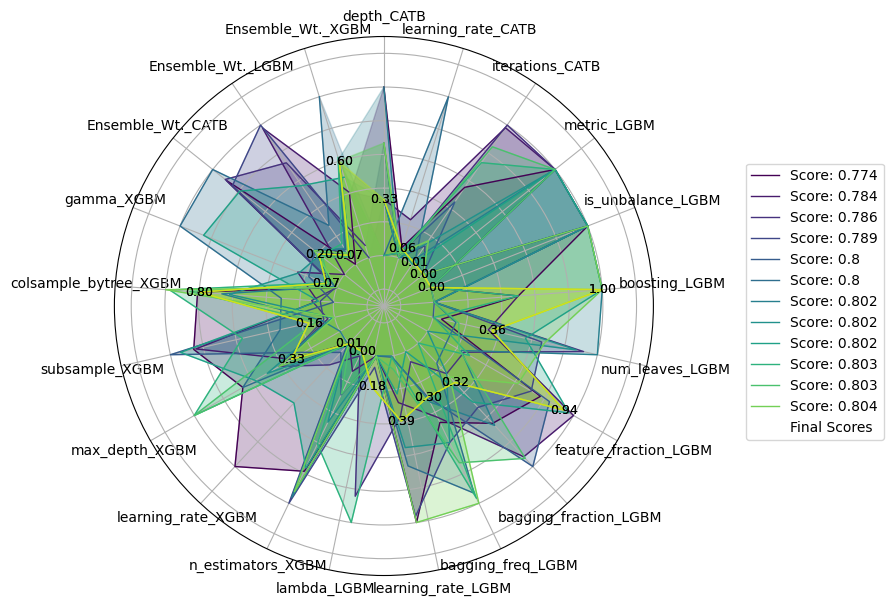

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
labels = new_df.columns[:-1]  # Exclude the 'Score' column
best_score_row = new_df_sorted.iloc[-1]
best_score = best_score_row['Score']
versions = new_df_sorted.drop(columns='Score').to_dict(orient='records')
scores = new_df_sorted['Score']

# Plot radar graph
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(17, 7), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

legend_handles = []  # List to store legend handles
legend_labels = []   # List to store legend labels

for i, (version, score) in enumerate(zip(versions, scores)):
    values = [version[key] for key in labels]
    color = plt.cm.viridis(i / len(scores))  # Adjust the color based on the position
    
    if version == best_score_row.drop('Score').to_dict():
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Score: {best_score}", color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        
        # Add radar values as text labels for the best radar graph
        for angle, value in zip(angles, values):
            ax.text(angle, value, f'{value:.2f}', color='black', fontsize=9, ha='center', va='center')
    else:
        line, = ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        legend_handles.append(line)
        legend_labels.append(f"Score: {score}")

legend_labels.append(f"Final Scores")
line, = ax.plot(angles, values, linewidth=0, linestyle='solid', color="white")
legend_handles.append(line)


ax.set_yticklabels([])

# Set custom positions for the x-axis tick marks
custom_positions = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
custom_positions[10] -= 0.055  # Shift the tick mark positions
custom_positions[11] += 0.055 # Shift the tick mark positions
ax.set_xticks(custom_positions)
ax.set_xticklabels(labels, fontsize=10)

# Set axis limits to slightly lower and higher values
ax.set_ylim(-0.3, 1.3)

# Add legend with all scores
ax.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.44, 0.777))

plt.show()


# Chat GPT links:

1) https://chat.openai.com/share/c73821db-2d09-4851-9e95-65c09101fef2

2) https://chat.openai.com/share/f3520156-c785-4193-9e90-c27fadf80c57

3) https://chat.openai.com/share/6f137401-1edf-4774-8f49-d62df8591125